# GP-bounding-box

**Motivation:** Rachel mentioned (and I think was a good proposal) to test increasing the size of the bounding box used for the GP fit. 

I examined the fits that I had already, and it seems like this might be the biggest issue was the the lower right SR fit (reproduced below).

<img src="figures/data161718-MAY21_4b_sr_170_68_detaCut_ggf/X_hh_dEta_hh_m_hh_SR_Xwt_cut_rw_100_bs.png" />


The reason why I thought the GP was an issue here was j b/c the norm is _clearly_ much more wrong for the inside SR than the outside SR, making it seem like the *interpolation was sus*.

However, when I tried redoing the fits increasing the bounding box for the lower right region (even when I used the unblinded massplane", I was getting error messages like: 

```
  File "/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/gp-for-flows/gp.py", line 297, in train
    pipe.fit(m1m2[blind], norm_bkgd)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py", line 265, in fit
    self.L_ = cholesky(K, lower=True)  # Line 2
  File "/opt/conda/lib/python3.8/site-packages/scipy/linalg/decomp_cholesky.py", line 88, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
  File "/opt/conda/lib/python3.8/site-packages/scipy/linalg/decomp_cholesky.py", line 37, in _cholesky
    raise LinAlgError("%d-th leading minor of the array is not positive "
numpy.linalg.LinAlgError: ("The kernel, RBF(length_scale=[0.5, 0.5]), is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '232-th leading minor of the array is not positive definite')
```

So I just sort of wanted to load some of these fits into a notebook so that I could test increasing alpha (the stat error on the input data points) in real time instead of needing to load in the notebook solo every time.

In [78]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.sys.path += ['../gp-for-flows/','../PyATLASstyle','../PAG-opt/','../../hh4b/hh4b-plots/']

from bkgPred import gp_pred, get_kinematic_regions
from plots import draw_SR
from hh4b_plots.colors import *
from hh4b_plots.phys_utils import get_lumi

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
yr = 16

x,y = 170, 68

In [88]:
fname = f"../data/RR/NR-UNBLIND-FEB22-1/data{yr}.root" 

In [89]:
f = uproot.open(fname)

In [90]:
fmp = f['fullmassplane']

In [91]:
load_cols = ['ntag','pass_vbf_sel','m_h1','m_h2']

In [92]:
df_all = fmp.arrays(load_cols,library='pd')

In [93]:
df = df_all[(~df_all.pass_vbf_sel) & (df_all.ntag >= 4)]

In [94]:
nEvents = 100000
r_CR = 45
eps = .05

In [95]:
nbinsx, nbinsy = 25,25

In [99]:
get_kinematic_regions(df, x, y, eps, r_CR)

Using 0.07294117647058823 m_h1 resolution.
Using 0.1720588235294118 m_h2 resolution.


/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../gp-for-flows/bkgPred.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["X_hh"] = Xhh(*df[["m_h1", "m_h2"]].values.T, x, y)
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../gp-for-flows/bkgPred.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VR_hh"] = VR_hh(*df[["m_h1", "m_h2"]].values.T, x, y)
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../gp-for-flows/bkgPred.py:130: SettingWithCopyWarning: 
A value is trying to be set

In [100]:
subDir=f'data161718-MAY21_4b_sr_{x}_{y}_detaCut_ggf'

In [101]:
r_CR = 60
nbins = 33

dfi, norms = gp_pred(
            df,
            nEvents,
            x,
            y,
            r_CR,
            eps, 
            is_mc=False,
            nbinsx=nbins,
            nbinsy=nbins,
            outDir=f'../gp-for-flows/models/{subDir}'
        )

118.5 238.5
11.400000000000006 131.4
blinded True
Using 0.07294117647058823 m_h1 resolution.
Using 0.1720588235294118 m_h2 resolution.
Using 0.07294117647058823 m_h1 resolution.
Using 0.1720588235294118 m_h2 resolution.
Using 0.07294117647058823 m_h1 resolution.
Using 0.1720588235294118 m_h2 resolution.
Using 0.07294117647058823 m_h1 resolution.
Using 0.1720588235294118 m_h2 resolution.
# of blinded bins 118
mean 26.799176107106078 std 20.71979305504668


LinAlgError: ("The kernel, RBF(length_scale=[0.5, 0.5]), is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '232-th leading minor of the array is not positive definite')

In [102]:
#region_tag='lower right'

/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:17: RuntimeWarning: invalid value encountered in sqrt
  SR_y1 = y / (1 + res_y * np.sqrt(np.power(Xhh, 2) - alpha))
/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/Shape-Syst/../PAG-opt/plots.py:18: RuntimeWarning: invalid value encountered in sqrt
  SR_y2 = y / (1 - res_y * np.sqrt(np.power(Xhh, 2) - alpha))


FileNotFoundError: [Errno 2] No such file or directory: 'figures/data16-MAY21_4b_sr_170_68_detaCut_ggf/massplane_CR_45GeV.pdf'

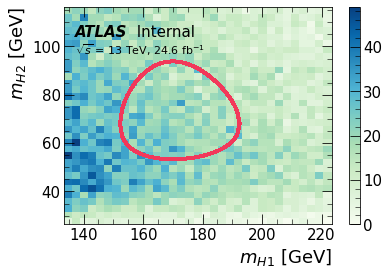

In [105]:

xx,yy = draw_SR(x,y,res_x=.1*124/x,res_y=.1*117/y)


plt.hist2d(*df[['m_h1','m_h2']].values.T,[nbins,nbins],
           [[x*(1+eps) - 45, x*(1+eps)+45],[y*(1+eps)-45,y*(1+eps)+45]],
           cmap='GnBu')
plt.plot(xx,yy,'hh:darkpink',lw=3)

plt.colorbar()
plt.xlabel('$m_{H1}$ [GeV]',loc='right',fontsize=18)
plt.ylabel('$m_{H2}$ [GeV]',loc='top',  fontsize=18)


fig,ax = plt.gcf(), plt.gca()
pas.makeATLAStag(ax, fig, first_tag=' Internal',
                 second_tag=r"$\sqrt{s}$ = 13 TeV, "+str(get_lumi(str(yr)))+" fb$^{-1}$",
                 ymax=.85,line_spacing=.2,
                 fontsize_title=15,fontsize_label=11)    
plt.savefig(f'figures/{subDir}/massplane16_CR_45GeV.pdf',bbox_inches='tight')
plt.show()

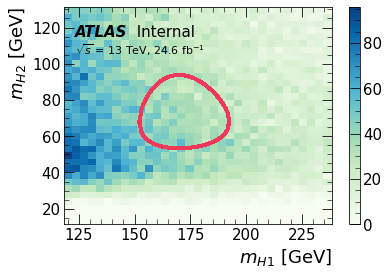

In [106]:
plt.hist2d(*df[['m_h1','m_h2']].values.T,[nbins,nbins],
           [[x*(1+eps) - r_CR, x*(1+eps)+r_CR],[y*(1+eps)-r_CR,y*(1+eps)+r_CR]],
           cmap='GnBu')
plt.plot(xx,yy,'hh:darkpink',lw=3)


plt.colorbar()
plt.xlabel('$m_{H1}$ [GeV]',loc='right',fontsize=18)
plt.ylabel('$m_{H2}$ [GeV]',loc='top',  fontsize=18)

fig,ax = plt.gcf(), plt.gca()
pas.makeATLAStag(ax, fig, first_tag=' Internal',
                 second_tag=r"$\sqrt{s}$ = 13 TeV, "+str(get_lumi(str(yr)))+" fb$^{-1}$",
                 ymax=.85,line_spacing=.2,
                 fontsize_title=15,fontsize_label=11)    

plt.savefig(f'figures/{subDir}/massplane16_CR_{r_CR}GeV.pdf',bbox_inches='tight')
plt.show()

**Conclusion